In [147]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import os

cwd = os.getcwd()
datadir = '/'.join(cwd.split('/')[0:-1]) + '/Yelpdataset/'
data = pd.read_csv(datadir + 'data_clean_divide.csv', header=0, sep = ',')

In [154]:
datanew=data.drop(['useful_user', 'funny_user', 'cool_user','funny_review',
                   'cool_review','useful_review', 'compliment_list', 'compliment_funny', 
                   'compliment_plain', 'compliment_note', 'compliment_writer', 'compliment_cute', 'fans','elite_years',
                   'compliment_profile', 'compliment_cool','compliment_hot','Vietnamese','Korean','Thai','Chinese','Japanese', 
                   'Mexican','Italian','is_open','American','attributes.RestaurantsPriceRange2',
                   'stars_business','date_review_to_now','user_yelping_to_now','compliment_more',
                   'since_first_review','operatinghours','traffic','ambience','review_count_business','price_cost'],1)

# 'compliment_more','since_first_review','traffic',
#                    'average_stars_user','count_food_quality','count_food_detail','price_cost','review_count_business',
#                    'ambience',,

# 'review_count_user','stars_review','compliment_photos',
#                    'friends_number','queue_in_line'

# 'traffic ','ambience','service','queue_in_line','count_food_detail',
# review_count_business
# 'count_food_quality'
# price_cost

#'review_count_user'
#friends_number & fans
#elite_years 是怎么评选的？在usefulreview之前还是之后

In [155]:
datanew.head(20).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
stars_review,4.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,5.00,5.00,4.00,4.00,4.00,4.00,4.00
review_count_user,114.00,212.00,212.00,308.00,308.00,308.00,308.00,308.00,308.00,308.00,308.00,308.00,308.00,308.00,308.00,308.00,308.00,308.00,308.00,308.00
average_stars_user,3.96,3.41,3.41,4.09,4.09,4.09,4.09,4.09,4.09,4.09,4.09,4.09,4.09,4.09,4.09,4.09,4.09,4.09,4.09,4.09
compliment_photos,0.00,1.00,1.00,330.00,330.00,330.00,330.00,330.00,330.00,330.00,330.00,330.00,330.00,330.00,330.00,330.00,330.00,330.00,330.00,330.00
friends_number,102.00,10.00,10.00,715.00,715.00,715.00,715.00,715.00,715.00,715.00,715.00,715.00,715.00,715.00,715.00,715.00,715.00,715.00,715.00,715.00
text_length,99.00,287.00,165.00,306.00,365.00,345.00,483.00,368.00,505.00,499.00,388.00,393.00,99.00,510.00,617.00,216.00,370.00,332.00,271.00,227.00
text_positive,6.00,15.00,12.00,10.00,8.00,16.00,17.00,10.00,22.00,26.00,22.00,14.00,7.00,19.00,28.00,14.00,23.00,14.00,12.00,4.00
text_negative,0.00,8.00,2.00,4.00,4.00,3.00,5.00,5.00,7.00,8.00,1.00,1.00,1.00,7.00,8.00,2.00,4.00,2.00,1.00,3.00
count_food_detail,1.00,1.00,0.00,6.00,3.00,7.00,11.00,8.00,6.00,6.00,10.00,15.00,2.00,18.00,9.00,5.00,5.00,4.00,3.00,6.00
count_food_quality,0.00,0.00,0.00,1.00,0.00,0.00,1.00,2.00,5.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00


In [158]:
bool_cols = [col for col in datanew if datanew[[col]].dropna()
             .isin([0, 1]).all().values]
total_cols=[col for col in datanew]
left_cols = [x for x in total_cols if x not in bool_cols]

for column in datanew[left_cols]:
    datanew[column] = preprocessing.scale((data[column]))

/Users/zhangben/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [160]:
train_pct = 0.8
rand = np.random.rand(datanew.shape[0])
rand_filt = (rand < train_pct)
train_df = datanew[rand_filt]
test_df = datanew[(rand_filt == False)]


In [162]:
from sklearn import svm
X_train = train_df.drop('Useful', 1)
Y_train = train_df['Useful']
X_test = test_df.drop('Useful', 1)
Y_test = test_df['Useful']
clf = svm.SVC(kernel='linear',probability=True, max_iter=100000) 
clf.fit(X_train, Y_train)
preds_clf = clf.predict_proba(X_test)[:, 1]


/Users/zhangben/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


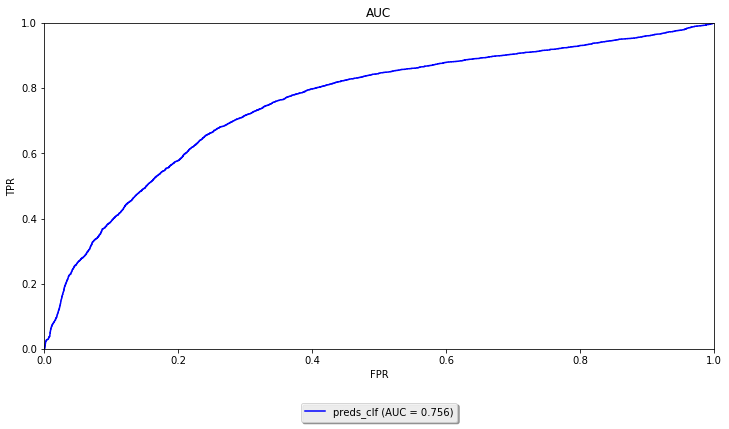

In [163]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline

fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)

fpr_clf, tpr_clf, thresholds_clf = roc_curve(Y_test, preds_clf)
roc_auc_clf = auc(fpr_clf, tpr_clf)
plt.plot(fpr_clf, tpr_clf, color = 'b', label = 'preds_clf' + ' (AUC = %0.3f)' % roc_auc_clf)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC')
plt.legend(loc="lower right")   

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 4, prop = {'size':10})

In [ ]:
# train_pct = 0.6
# rand = np.random.rand(datanew.shape[0])
# rand_filt = (rand < train_pct)
# train_df = datanew[rand_filt]
# split_df = datanew[(rand_filt == False)]

In [143]:
# s={'stars_review':0.0242484036513,'is_open':0.00401802246321,
#    'review_count_business':0.0414063451731,'stars_business': 0.0139467707229,
#   'attributes.RestaurantsPriceRange2': 0.00823030785176,'review_count_user': 0.221933535086,
#    'average_stars_user': 0.0398714311314,'compliment_photos': 0.155098080173,
#    'since_first_review': 0.0493608241498,'date_review_to_now': 0.0392185447007,
#    'text_length': 0.152308298293,'text_positive': 0.0732413751681,
#    'text_negative': 0.0434901901933,'user_yelping_to_now': 0.0475042916749,
#    'Chinese'from sklearn.metrics import accuracy_score
# accuracy_score(Y_test, preds_clf): 0.00220738258924,'Mexican': 0.0030393692717,'American': 0.00493467322848,
#    'Korean': 0.00104042413755,'Italian': 0.00389141723823,'Japanese': 0.00251848558695,
#    'Thai': 0.00115435716965,'Vietnamese': 0.000887051665578,'count_food_detail': 0.0159523569766,
#    'count_food_quality': 0.00429327218529,'operatinghours': 0.0262011686725,'price_cost': 0.00203644656675,
#    'traffic': 0.000247847022206,'queue_in_line': 0.00759858659207,'service': 0.00699027045831,
#    'ambience': 0.00313047020582}
# x=pd.Series(s)
# y = x.sort_values()
# y

traffic                              0.000248
Vietnamese                           0.000887
Korean                               0.001040
Thai                                 0.001154
price_cost                           0.002036
Chinese                              0.002207
Japanese                             0.002518
Mexican                              0.003039
ambience                             0.003130
Italian                              0.003891
is_open                              0.004018
count_food_quality                   0.004293
American                             0.004935
service                              0.006990
queue_in_line                        0.007599
attributes.RestaurantsPriceRange2    0.008230
stars_business                       0.013947
count_food_detail                    0.015952
stars_review                         0.024248
operatinghours                       0.026201
date_review_to_now                   0.039219
average_stars_user                

In [ ]:
# from sklearn.metrics import accuracy_score
# preds_clf_ac = clf.predict(X_test)
# accuracy_score(Y_test, preds_clf)